In [1]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from matplotlib import font_manager, rc
import matplotlib as plt

plt.rcParams['axes.unicode_minus'] = False
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

In [4]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [5]:
counts = {}

for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
    
print("특성 카운트:\n{}".format(counts))

특성 카운트:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


ExecutableNotFound: failed to execute ['dot', '-Tpng', '-O', 'tmp'], make sure the Graphviz executables are on your systems' PATH

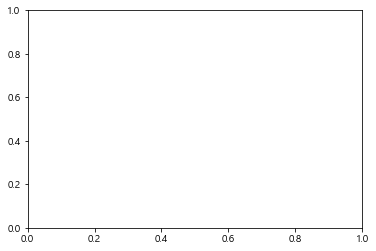

In [6]:
mglearn.plots.plot_animal_tree()

In [ ]:
mglearn.plots.plot_tree_progressive()